In [8]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [9]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [10]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  y


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [14]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [15]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.7107028006268488, 0.47541960414911477],
 'diameter': 76.19284123607768,
 'confidence': 0.7582130432128906,
 'timestamp': 560551.586588,
 'sphere': {'center': [7.457511442517039,
   3.4003265540001983,
   37.835928136415404],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [151.56627548493788, 121.32178643990491],
  'axes': [185.79480062169935, 185.79480062169935],
  'angle': 0.0},
 'circle_3d': {'center': [4.063964508544734,
   0.5337792163681496,
   28.44088978800821],
  'normal': [-0.32654420597275663, -0.2758336461711114, -0.9040379865832917],
  'radius': 3.468845544025498},
 'diameter_3d': 6.937691088050996,
 'ellipse': {'center': [136.45493772035496, 100.71943600336996],
  'axes': [72.77723854080564, 76.19284123607768],
  'angle': 59.20524941236668},
 'location': [136.45493772035496, 100.71943600336996],
 'model_confidence': 1.0,
 'theta': 1.8502532138387533,
 'phi': -1.917419386

Text(0.5, 0, 'Pupil timestamp (s)')

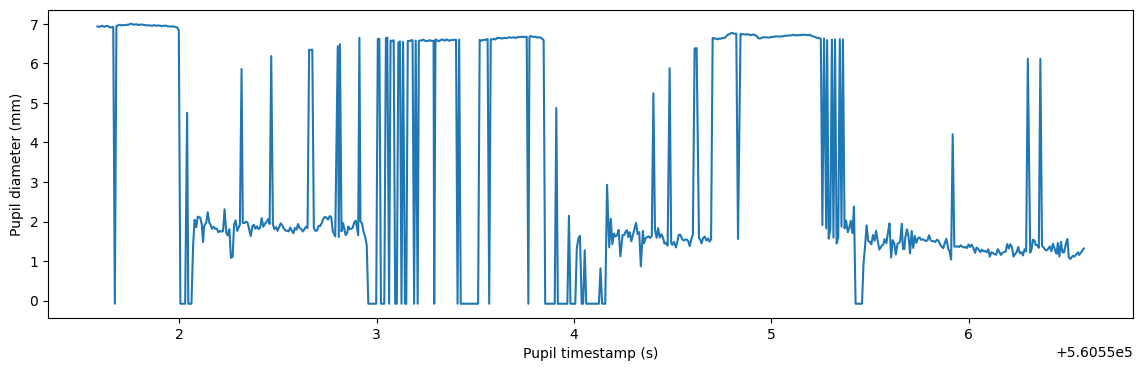

In [16]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')